In [1]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16

2023-12-28 10:30:27.800965: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-28 10:30:27.848752: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 10:30:27.848786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 10:30:27.850071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 10:30:27.858168: I tensorflow/core/platform/cpu_feature_guar

In [2]:
!wget https://www.indianhealthyrecipes.com/wp-content/uploads/2022/04/idli-recipe.jpg

--2023-12-28 10:30:32--  https://www.indianhealthyrecipes.com/wp-content/uploads/2022/04/idli-recipe.jpg
Resolving www.indianhealthyrecipes.com (www.indianhealthyrecipes.com)... 23.210.93.107, 23.210.93.41, 2405:200:1630:a00::b856:f843, ...
Connecting to www.indianhealthyrecipes.com (www.indianhealthyrecipes.com)|23.210.93.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138276 (135K) [image/jpeg]
Saving to: ‘idli-recipe.jpg’

idli-recipe.jpg     100%[===================>] 135.04K  --.-KB/s    in 0.01s   

2023-12-28 10:30:33 (10.4 MB/s) - ‘idli-recipe.jpg’ saved [138276/138276]



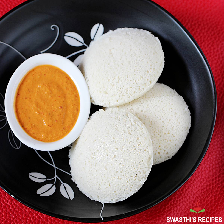

In [4]:
# Load an image from file
image = load_img('idli-recipe.jpg', target_size=(224,224))
image

In [5]:
# Convert the image pixels to a numpy array
image = img_to_array(image)
image.shape

(224, 224, 3)

In [6]:
# Reshape the data for model
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
image.shape

# OR


(1, 224, 224, 3)

In [7]:
image = preprocess_input(image)
image

array([[[[ -69.939   ,  -99.779   ,   81.32    ],
         [ -85.939   , -111.779   ,   56.32    ],
         [ -78.939   , -105.779   ,   65.32    ],
         ...,
         [ -37.939003,  -76.779   ,   94.32    ],
         [ -37.939003,  -75.779   ,   91.32    ],
         [ -44.939003,  -85.779   ,   91.32    ]],

        [[ -35.939003,  -74.779   ,   90.32    ],
         [ -67.939   ,  -95.779   ,   72.32    ],
         [ -80.939   , -105.779   ,   77.32    ],
         ...,
         [ -41.939003,  -80.779   ,   90.32    ],
         [ -42.939003,  -80.779   ,   86.32    ],
         [ -47.939003,  -88.779   ,   88.32    ]],

        [[ -61.939003,  -94.779   ,   71.32    ],
         [ -57.939003,  -88.779   ,   75.32    ],
         [ -53.939003,  -88.779   ,   86.32    ],
         ...,
         [ -47.939003,  -86.779   ,   84.32    ],
         [ -52.939003,  -90.779   ,   76.32    ],
         [ -50.939003,  -91.779   ,   85.32    ]],

        ...,

        [[ -62.939003,  -97.779   ,   

In [8]:
# Load the model
model = VGG16()

553467096/553467096 [==============================] - 33s 0us/step


In [9]:
# Predict the probabaility across all output classes
yhat = model.predict(image)

1/1 [==============================] - 1s 1s/step


In [10]:
# Convert the probabilties to class labels
label = decode_predictions(yhat)
label

35363/35363 [==============================] - 0s 0us/step


[[('n03259280', 'Dutch_oven', 0.3413037),
  ('n03314780', 'face_powder', 0.15109468),
  ('n03400231', 'frying_pan', 0.09332405),
  ('n03775546', 'mixing_bowl', 0.08596915),
  ('n04019541', 'puck', 0.05298821)]]